In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sympy as sp


### Рассчет распределения интенсивности в ближней зоне

In [2]:
sub_app = 39 # mm
rad = 39 # mm
N = int(5000)
E0 = 1*10**10 # V/m
leng = 200 # mm
h = leng/N
x0 = 100 * h
y0 = 100 * h
x_1 = 39 * h + x0
y_1 = 39 * h + y0
x_2 = -39 * h + x0
y_2 = 39 * h + y0
x_3 = -39 * h + x0
y_3 = -39 * h + y0
x_4 = 39 * h + x0
y_5 = -39 * h + y0
phi_1 = 0
phi_2 = 5
phi_3 = 10
phi_4 = 15

In [3]:
#_point_1_near_order
k = 10000
rad_s = rad * 25
y0_s = 2500
x0_s = 2500
difmx = 0.2
u = np.zeros((N, N))
step_p = 2 * math.pi/k
x_lap = np.zeros((k))
y_lap = np.zeros((k))
h_m = h * 25
x_1 = (39 * h + x0)*25
y_1 = (39 * h + y0)*25
y_u = (rad * h + x_1)*25 
x_r = (x_1 + rad * h)*25
x_l = (x_1 - rad * h)*25
y_d = (x_1 - rad * h)*25 
for i in range(k):
        x_lap[i] = (rad * math.cos(i*step_p) + x_1)*25
        y_lap[i] = (rad * math.sin(i*step_p) + y_1)*25
for i in range(2480,N):
        for j in range(2480,N):
                count = 0
                sqr_u = (i - 3475)**2 + (j - 3476)**2 
                sqr_r = (i - 3476)**2 + (j - 3475)**2
                sqr_d = (i - 3475)**2 + (j - 3474)**2 
                sqr_l = (i - 3474)**2 + (j - 3475)**2
                sqr = (i - 3475)**2 + (j - 3475)**2
                if(sqr < rad_s ** 2):
                        u[i][j] = E0
                # down side
                if((sqr_l < rad_s ** 2) and (sqr > rad_s ** 2)):
                        count += 1
                        diff = 2 * rad_s**2
                        ku = k*0.7
                        en = k * 0.25
                        while((abs(j - diff) > difmx) and(en < ku)):
                                en += 1
                                diff = y_lap[int(en)]
                        dist = abs(i - x_lap[int(en)])
                        app_l = u[i - 1, j] * dist/(dist + h_m) + E0 * h_m/(dist + h_m)
                        #print(app_l)
                else:
                        app_l = 0
                # upside
                if((sqr_r < rad_s ** 2) and (sqr > rad_s ** 2)):
                        if (j > 3474):
                                count += 1
                                diff = 2 * rad_s**2
                                ku = k*0.3
                                en = 0
                                while((abs(j - diff) > difmx) and(en < ku)):
                                        en += 1
                                        diff = y_lap[int(en)]
                                dist = abs(i - x_lap[int(en)])
                                app_r = u[i + 1, j] * dist/(dist + h_m) + E0 * h_m/(dist + h_m)
                                #print(app_r)
                        if (j < 3475):
                                count += 1
                                diff = 2 * rad_s**2
                                ku = k - 1
                                en = k * 0.7
                                while((abs(j - diff) > difmx) and(en < ku)):
                                        en += 1
                                        diff = y_lap[int(en)]
                                dist = abs(i - x_lap[int(en)])
                                app_r = u[i + 1, j] * dist/(dist + h_m) + E0 * h_m/(dist + h_m)
                                #print(app_r)
                else:
                        app_r= 0
                # right
                if((sqr_u < rad_s ** 2) and (sqr > rad_s ** 2)):
                        count += 1
                        diff = 2 * rad_s**2
                        ku = k * 0.5
                        en = 0
                        while((abs(i - diff) > difmx) and(en < ku)):
                                en += 1
                                diff = x_lap[int(en)]
                        dist = abs(j - y_lap[int(en)])
                        app_u = u[i, j + 1] * dist/(dist + h_m) + E0 * h_m/(dist + h_m)
                else:
                        app_u = 0
                # left
                if((sqr_d < rad_s ** 2) and (sqr > rad_s ** 2)):
                        count += 1
                        diff = 2 * rad_s**2
                        ku = k - 1
                        en = k * 0.5
                        while((abs(i - diff) > difmx) and(en < ku)):
                                en += 1
                                diff = x_lap[int(en)]
                        dist = abs(j - y_lap[int(en)])
                        app_d = u[i, j - 1] * dist/(dist + h_m) + E0 * h_m/(dist + h_m)
                else:
                        app_d = 0
                if(count == 3):
                        u[i][j] = math.sqrt((app_l**2 + app_r**2 + app_u**2 + app_d**2)/3)
                elif(count == 2):
                        u[i][j] = math.sqrt((app_l**2 + app_r**2 + app_u**2 + app_d**2)/2)
                        #print(u[i,j])
                elif(count == 1):
                        u[i][j] = math.sqrt(app_l**2 + app_r**2 + app_u**2 + app_d**2)
                        #print(u[i,j])
                        #print(app_u)
                app_l = 0
                app_r = 0
                app_u = 0
                app_d = 0

In [4]:
# point_4_near_order
u = u ** 2
for i in range(N):
        for j in range(N):
                u[i][j] = u[4999 - i][4999 - j]
                u[4999-i][j] = u[4999 - i][4999 - j]
                u[i][4999 - j] = u[4999 - i][4999 - j] 

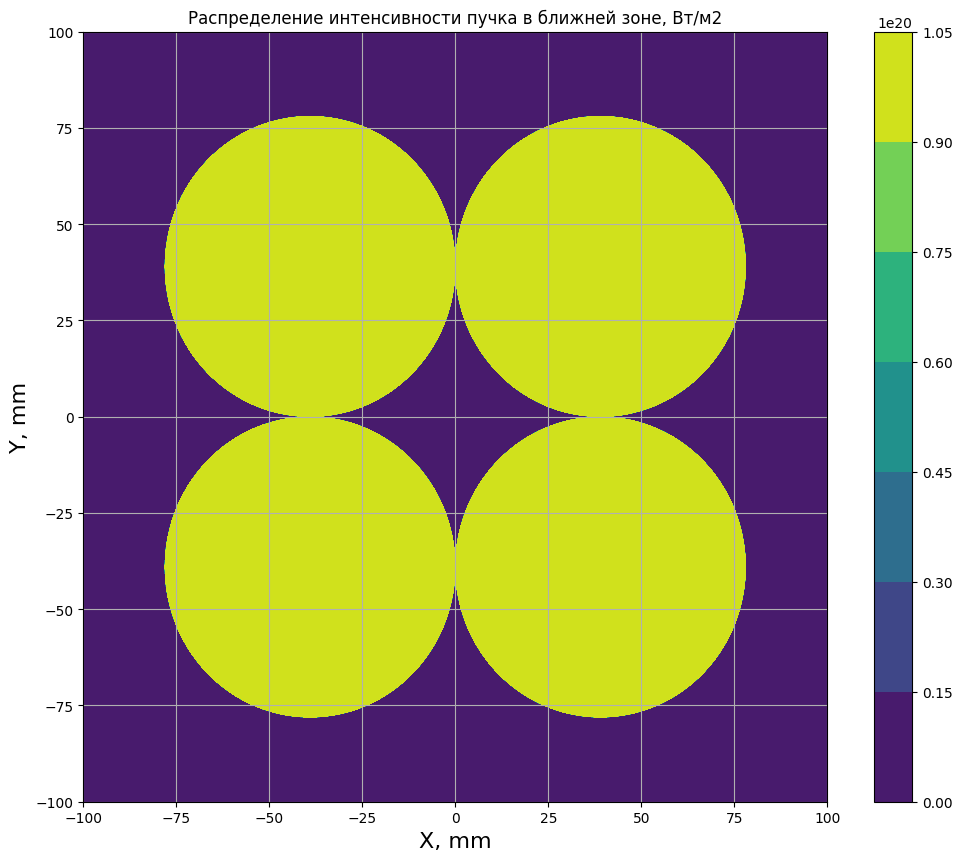

In [5]:
plt.figure(figsize=(12,10))
plt.axes()
xy_graph = np.linspace(-100,100, N)
X,Y = np.meshgrid(xy_graph,xy_graph)
ax = plt.contourf(X, Y, u)
plt.colorbar(ax)
plt.title('Распределение интенсивности пучка в ближней зоне, Вт/м2')
plt.xlabel('X, mm', fontsize = 16)
plt.ylabel('Y, mm', fontsize = 16) 
plt.grid()
plt.show()

### Расчет распределния интенсивности в дальней зоне

In [6]:
import cmath
from scipy.special import jv

In [7]:
N_dal = 10
u_dal1 = np.zeros((N_dal,N_dal))
leng = 100
step = leng /(N_dal - 1)
const_k =  5.902 *10 ** 12 # 1/mm
lamb = 1064 * 1 * 10 ** (-9) #mm
z = 2 # m
a = 0.039 # m
x_1 = 0.039 #m
y_1 = 0.039 #m
# Выберем произвольные фазы
phi1 = 0
phi2 = 2
phi3 = 3.5
phi4 = 4

In [8]:
def C(u,v):
        constant_c = cmath.exp((z * 1j * const_k *(u**2 + v**2))/2)/(1j * lamb * z)
        return constant_c

In [9]:
def E(tet1, tet2):
        a = 0.039
        x1 = 0.5 * a
        y1 = 0.5 * a
        x2 =  - 0.5 * a
        y2 = 0.5 * a
        x3 = - 0.5 * a
        y3 = - 0.5 * a
        x4 = 0.5 * a
        y4 = - 0.5 * a
        expression = (2 * math.pi* a**2 * E0 * C(tet1, tet2)*jv(1, const_k * a *math.sqrt(tet1**2 + tet2**2))/(const_k * a * math.sqrt(tet1**2 + tet2**2)))
        summary_exp = (cmath.exp(-1j*const_k*(tet1**2*x1 + tet2**2*y1)) * cmath.exp(1j * phi1) 
                       + cmath.exp(-1j*const_k*(tet1**2*x2 + tet2**2*y2)) * cmath.exp(1j * phi2)
                        + cmath.exp(-1j*const_k*(tet1**2*x3 + tet2**2*y3)) * cmath.exp(1j * phi3) 
                        + cmath.exp(-1j*const_k*(tet1**2*x4 + tet2**2*y4)) * cmath.exp(1j * phi4)) 
        return abs(expression * summary_exp)**2

In [10]:
x = np.linspace(-0.1, 0.1, N_dal)
y = np.linspace(-0.1, 0.1, N_dal)
for i in range(len(x)):
        for l in range(len(y)):
                u_dal1[i][l] = E(x[i]/z, y[l]/z)


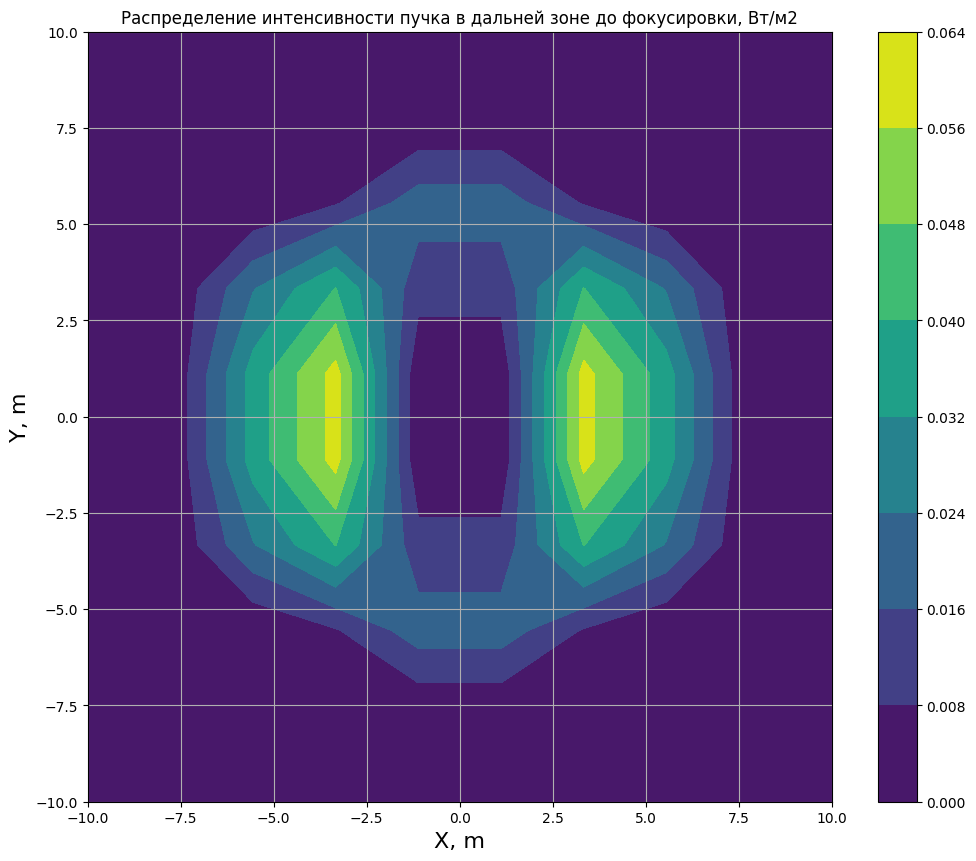

In [11]:
plt.figure(figsize=(12,10))
plt.axes()
xy_graph = np.linspace(-10,10, N_dal)
X,Y = np.meshgrid(xy_graph,xy_graph)
ax = plt.contourf(X,Y,u_dal1)
plt.colorbar(ax)
plt.title('Распределение интенсивности пучка в дальней зоне до фокусировки, Вт/м2')
plt.xlabel('X, m', fontsize = 16)
plt.ylabel('Y, m', fontsize = 16) 
plt.grid()
plt.show()

In [12]:
fig = go.Figure(data = go.Contour(z = u_dal1,  colorscale='electric', 
            contours=dict(coloring ='heatmap'
            )))
fig.update_layout(
    title = 'Распределение интенсивности пучка в дальней зоне до фокусировки, Вт/м2',
    width=1000,
    height=1000,
    paper_bgcolor="White"
)
fig.show()
fig.write_html("Распределение интенсивности пучка в дальней зоне до фокусировки.html")

Для того, чтобы сфазировать 4 лазера нужно найти экстремум функции:
\begin{equation*}
    e^{i\varphi _1} * e^{-ik\theta _x R} + e^{i\varphi _2} * e^{ik\theta _x R} + e^{i\varphi _3} * e^{ik\theta _x R} + e^{i\varphi _4} * e^{-ik\theta _x R}
\end{equation*}

In [15]:
# метод оптимизации
import numpy as np
from scipy.optimize import minimize
k=5902255
a=0.0195
# Определение функции, модуль которой мы хотим максимизировать
def objective_function(x):
    h2, h3, h4 = x
    q_values = np.linspace(0, 2 * np.pi, 1000)  # Значения q от 0 до 2*pi
    max_mod = 0

    for q in q_values:
        expression = np.exp(-1j * k * q * a) + np.exp(1j * h2) * np.exp(1j * k * q * a) + np.exp(1j * h3) * np.exp(1j * k * q * a) + np.exp(1j * h4) * np.exp(-1j * k * q * a)
        mod_expression = np.abs(expression)
        max_mod = max(max_mod, mod_expression)

    return -max_mod  # Минус перед max_mod, так как minimize ищет минимум

# Начальные значения h2, h3 и h4
initial_guess = [0, 0, 0]

# Ограничения для h2, h3 и h4
constraints = ((0, 2 * np.pi), (0, 2 * np.pi), (0, 2 * np.pi))

# Поиск максимума модуля функции
result = minimize(objective_function, initial_guess, bounds=constraints)

# Вывод результатов
h2_opt, h3_opt, h4_opt = result.x
max_mod_value = -result.fun

print("Максимальное значение модуля:", max_mod_value)
print("Оптимальные значения h2, h3 и h4:", h2_opt, h3_opt, h4_opt)

Максимальное значение модуля: 4.0
Оптимальные значения h2, h3 и h4: 0.0 0.0 0.0


Был получен ожидаемый результат). Действительно Данная поверхность имеет множество максимумов в точках 2*pi*N, где N - целое число

### Распределение интенсивности в дальней зоне после фокусировки

In [16]:
N_dal = 10
u_dal1 = np.zeros((N_dal,N_dal))
leng = 100
step = leng /(N_dal - 1)
const_k =  5.902 *10 ** 12 # 1/mm
lamb = 1064 * 1 * 10 ** (-9) #mm
z = 0.1 # m
a = 0.039 # m
x_1 = 0.039 #m
y_1 = 0.039 #m
# Выберем произвольные фазы
phi1 = 0
phi2 = 2
phi3 = 3.5
phi4 = 4

In [17]:
def E_foc(tet1, tet2):
        a = 0.039
        x1 = 0.5 * a
        y1 = 0.5 * a
        x2 =  - 0.5 * a
        y2 = 0.5 * a
        x3 = - 0.5 * a
        y3 = - 0.5 * a
        x4 = 0.5 * a
        y4 = - 0.5 * a
        expression = (2 * math.pi* a**2 * E0 * C(tet1, tet2)*jv(1, const_k * a *math.sqrt(tet1**2 + tet2**2))/(const_k * a * math.sqrt(tet1**2 + tet2**2)))
        summary_exp = (cmath.exp(-1j*const_k*(tet1**2*x1 + tet2**2*y1)) 
                       + cmath.exp(-1j*const_k*(tet1**2*x2 + tet2**2*y2))
                        + cmath.exp(-1j*const_k*(tet1**2*x3 + tet2**2*y3)) 
                        + cmath.exp(-1j*const_k*(tet1**2*x4 + tet2**2*y4))) 
        return abs(expression * summary_exp)**2

In [18]:
x = np.linspace(-0.1, 0.1, N_dal)
y = np.linspace(-0.1, 0.1, N_dal)
for i in range(len(x)):
        for l in range(len(y)):
                u_dal1[i][l] = E_foc(x[i]/z, y[l]/z)

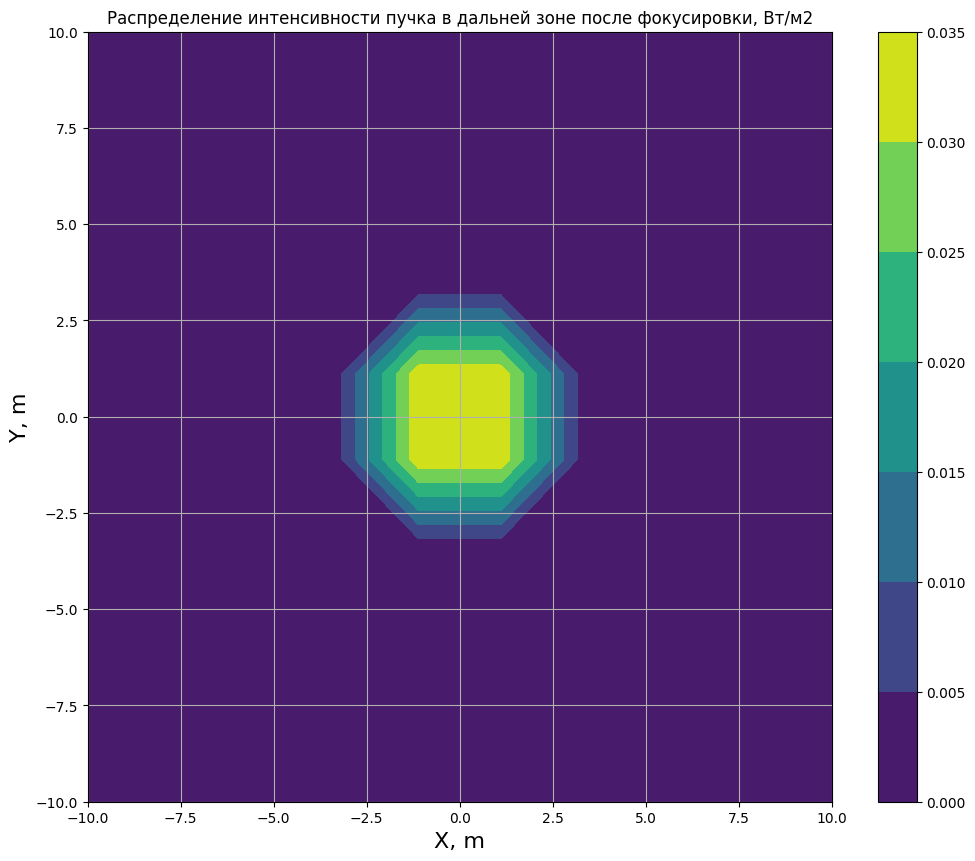

In [19]:
plt.figure(figsize=(12,10))
plt.axes()
xy_graph = np.linspace(-10,10, N_dal)
X,Y = np.meshgrid(xy_graph,xy_graph)
ax = plt.contourf(X,Y,u_dal1)
plt.colorbar(ax)
plt.title('Распределение интенсивности пучка в дальней зоне после фокусировки, Вт/м2')
plt.xlabel('X, m', fontsize = 16)
plt.ylabel('Y, m', fontsize = 16) 
plt.grid()
plt.show()

In [20]:
fig = go.Figure(data = go.Contour(z = u_dal1,  colorscale='electric', 
            contours=dict(coloring ='heatmap'
            )))
fig.update_layout(
    title = 'Распределение интенсивности пучка в дальней зоне до фокусировки, Вт/м2',
    width=1000,
    height=1000,
    paper_bgcolor="White"
)
fig.show()
fig.write_html("Распределение интенсивности пучка в дальней зоне после фокусировки.html")

Проварьируем продольную координату, посмотрим, что будет

In [21]:
def C_var_foc(u,v, z):
        constant_c = cmath.exp((z * 1j * const_k *(u**2 + v**2))/2)/(1j * lamb * z)
        return constant_c
def E_var_foc(tet1, tet2, z):
        a = 0.039
        x1 = 0.5 * a
        y1 = 0.5 * a
        x2 =  - 0.5 * a
        y2 = 0.5 * a
        x3 = - 0.5 * a
        y3 = - 0.5 * a
        x4 = 0.5 * a
        y4 = - 0.5 * a
        expression = (2 * math.pi* a**2 * E0 * C_var(tet1, tet2, z)*jv(1, const_k * a *math.sqrt(tet1**2 + tet2**2))/(const_k * a * math.sqrt(tet1**2 + tet2**2)))
        summary_exp = (cmath.exp(-1j*const_k*(tet1**2*x1 + tet2**2*y1)) * cmath.exp(1j * phi1) 
                       + cmath.exp(-1j*const_k*(tet1**2*x2 + tet2**2*y2)) * cmath.exp(1j * phi2)
                        + cmath.exp(-1j*const_k*(tet1**2*x3 + tet2**2*y3)) * cmath.exp(1j * phi3) 
                        + cmath.exp(-1j*const_k*(tet1**2*x4 + tet2**2*y4)) * cmath.exp(1j * phi4)) 
        return abs(expression * summary_exp)**2

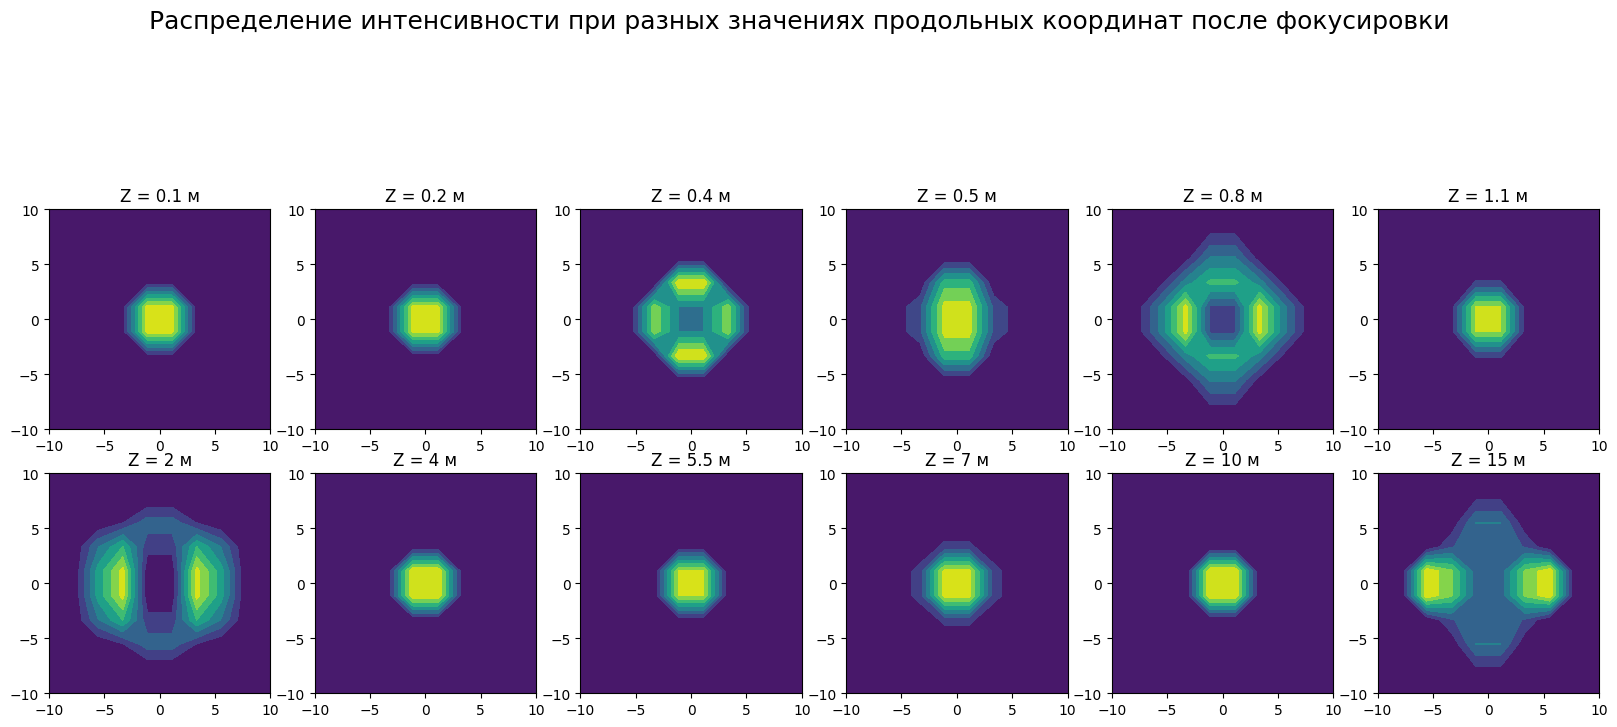

In [22]:
z = [0.1, 0.2, 0.4, 0.5, 0.8, 1.1, 2, 4, 5.5, 7, 10, 15]
x_var = np.linspace(-0.1, 0.1, N_dal)
y_var = np.linspace(-0.1, 0.1, N_dal)
xy_graph = np.linspace(-10,10, N_dal)
X,Y = np.meshgrid(xy_graph,xy_graph)
plt.figure(figsize=(20, 20))
plt.suptitle("Распределение интенсивности при разных значениях продольных координат после фокусировки", fontsize=18)
point = 0
for t in z:
        for i in range(len(x)):
                for l in range(len(y)):
                        u_dal1[i][l] = E_var_foc(x[i]/t, y[l]/t, t)
        ax = plt.subplot(6, 6, point + 1)
        plt.title('Z = ' + str(t)+ ' м')
        ax = plt.contourf(X,Y,u_dal1)
        point += 1
 

Как видно из графиков, при разных значениях координат получаются разные картины распределния максимума интенсивности. Это связано с тем, что продольная координата влияет на осевую интенсивность и на размер огибающей.